Paper link: https://openreview.net/forum?id=xx3qRKvG0T


Repo link: https://github.com/nzl5116190/Basisformer?tab=readme-ov-file

Group Repo Link: 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'data/all_countries.csv'
data = pd.read_csv(file_path)
data.head()
##hrly_df = pd.read_csv('all_countries.csv')

,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
0,Austria,AUT,2015-01-01 00:00:00,2015-01-01 01:00:00,17.93
1,Austria,AUT,2015-01-01 01:00:00,2015-01-01 02:00:00,15.17
2,Austria,AUT,2015-01-01 02:00:00,2015-01-01 03:00:00,16.38
3,Austria,AUT,2015-01-01 03:00:00,2015-01-01 04:00:00,17.38
4,Austria,AUT,2015-01-01 04:00:00,2015-01-01 05:00:00,16.38


In [21]:
data.shape

(2230248, 5)

In [22]:
data.Country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Czechia',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'North Macedonia', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia',
       'Sweden'], dtype=object)

In [23]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = round((df.isna().sum() / len(df)) * 100, 2)
    summary_df['count'] = df.count().values
    summary_df['unique'] = df.nunique().values
    return summary_df

summary(data).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,count,unique
Country,object,0,0.000000,2230248,29
ISO3 Code,object,0,0.000000,2230248,29
Datetime (UTC),object,0,0.000000,2230248,81792
Datetime (Local),object,0,0.000000,2230248,81795
Price (EUR/MWhe),float64,0,0.000000,2230248,51371


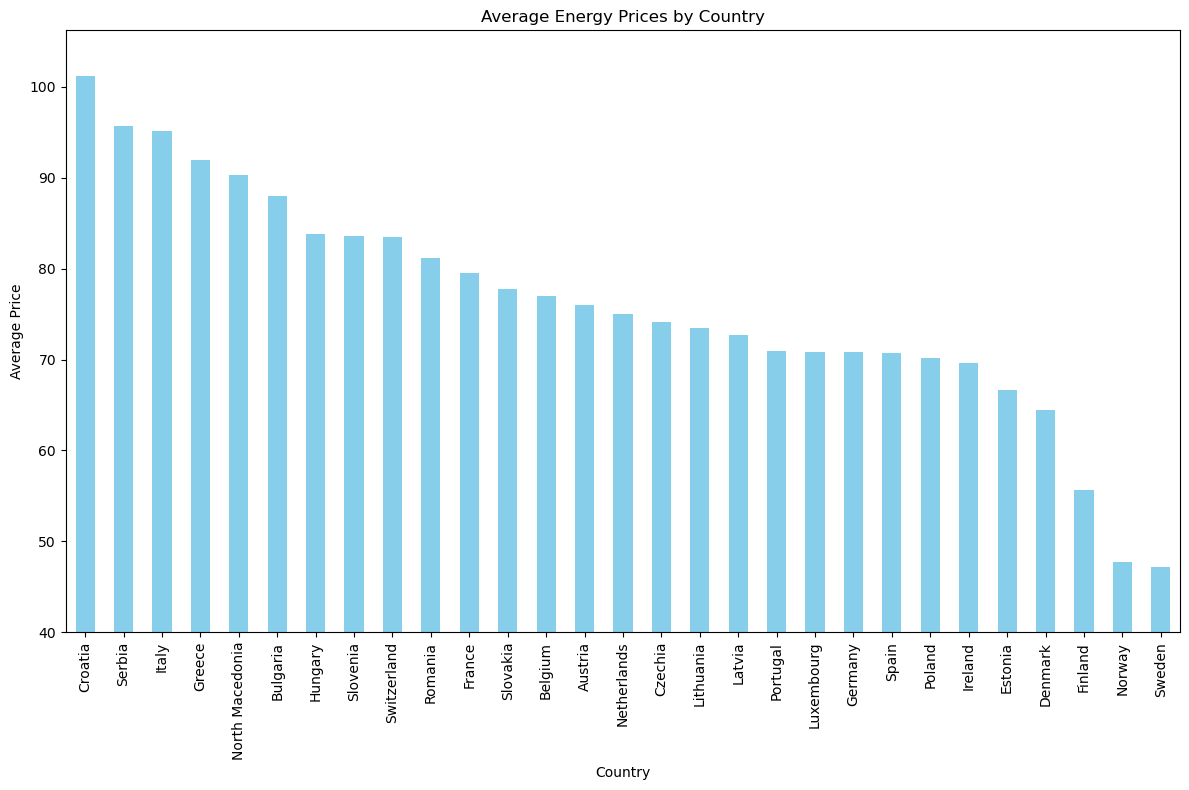

In [24]:
def plot_average_prices(df):
    average_prices = df.groupby('Country')['Price (EUR/MWhe)'].mean()

    average_prices = average_prices.sort_values(ascending=False)

    # Plot the histogram
    plt.figure(figsize=(12, 8))
    average_prices.plot(kind='bar', color='skyblue')
    plt.title('Average Energy Prices by Country')
    plt.xlabel('Country')
    plt.ylabel('Average Price')
    plt.ylim(40, average_prices.max() + 5)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_average_prices(data)

In [26]:
def country_summary_statistics(df):

    # Function to calculate summary statistics for a group
    def summarize(group):
        min_price = group['Price (EUR/MWhe)'].min()
        max_price = group['Price (EUR/MWhe)'].max()

        min_price_row = group[group['Price (EUR/MWhe)'] == min_price]
        max_price_row = group[group['Price (EUR/MWhe)'] == max_price]

        summary = {
            'count': group['Price (EUR/MWhe)'].count(),
            'start_date': group['Datetime (Local)'].min(),
            'end_date': group['Datetime (Local)'].max(),
            'min_price': min_price,
            'min_price_date': min_price_row['Datetime (Local)'].values[0],
            'max_price': max_price,
            'max_price_date': max_price_row['Datetime (Local)'].values[0],
            '1st_quartile': group['Price (EUR/MWhe)'].quantile(0.25),
            'median': group['Price (EUR/MWhe)'].median(),
            '3rd_quartile': group['Price (EUR/MWhe)'].quantile(0.75),
            'mean': group['Price (EUR/MWhe)'].mean(),
        }
        return pd.Series(summary)

    # Apply the summary function to each group
    summary_df = df.groupby('Country').apply(summarize).reset_index()

    return summary_df

data_summary = country_summary_statistics(data)
data_summary

/var/folders/y8/hhkwp1r54qg4ztcfjzk9c2800000gn/T/ipykernel_3708/1587509886.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby('Country').apply(summarize).reset_index()


,Country,count,start_date,end_date,min_price,min_price_date,max_price,max_price_date,1st_quartile,median,3rd_quartile,mean
0,Austria,81792,2015-01-01 01:00:00,2024-05-01 01:00:00,-500.00,2023-07-02 14:00:00,908.90,2022-08-29 16:00:00,30.2200,43.690,81.0400,76.003250
1,Belgium,81792,2015-01-01 01:00:00,2024-05-01 01:00:00,-500.00,2019-06-08 02:00:00,871.00,2022-08-29 19:00:00,33.7800,48.250,82.2700,77.031154
2,Bulgaria,66456,2016-10-01 03:00:00,2024-05-01 02:00:00,-45.00,2024-04-13 14:00:00,3119.84,2017-02-23 19:00:00,34.5400,53.150,103.8300,87.978832
3,Croatia,57696,2017-10-01 02:00:00,2024-05-01 01:00:00,-500.00,2023-07-02 14:00:00,920.00,2022-08-30 20:00:00,42.1575,64.010,116.4500,101.233836
4,Czechia,81792,2015-01-01 01:00:00,2024-05-01 01:00:00,-68.54,2023-05-28 13:00:00,871.00,2022-08-29 19:00:00,30.8700,44.510,80.7925,74.125093
5,Denmark,81792,2015-01-01 01:00:00,2024-05-01 01:00:00,-288.14,2023-07-02 14:00:00,871.00,2022-08-29 19:00:00,25.8900,38.750,67.5300,64.474822
6,Estonia,81792,2015-01-01 02:00:00,2024-05-01 02:00:00,-60.04,2023-07-16 15:00:00,4000.00,2022-08-17 18:00:00,29.9000,42.940,71.5900,66.616491
7,Finland,81792,2015-01-01 02:00:00,2024-05-01 02:00:00,-500.00,2023-11-24 15:00:00,1896.00,2024-01-05 19:00:00,26.0300,38.020,56.4500,55.621499
8,France,81792,2015-01-01 01:00:00,2024-05-01 01:00:00,-134.94,2023-07-02 15:00:00,2987.78,2022-04-04 08:00:00,32.7400,47.360,80.8825,79.490544
9,Germany,81792,2015-01-01 01:00:00,2024-05-01 01:00:00,-500.00,2023-07-02 14:00:00,1047.11,2022-08-23 20:00:00,29.2500,41.990,76.0800,70.834084


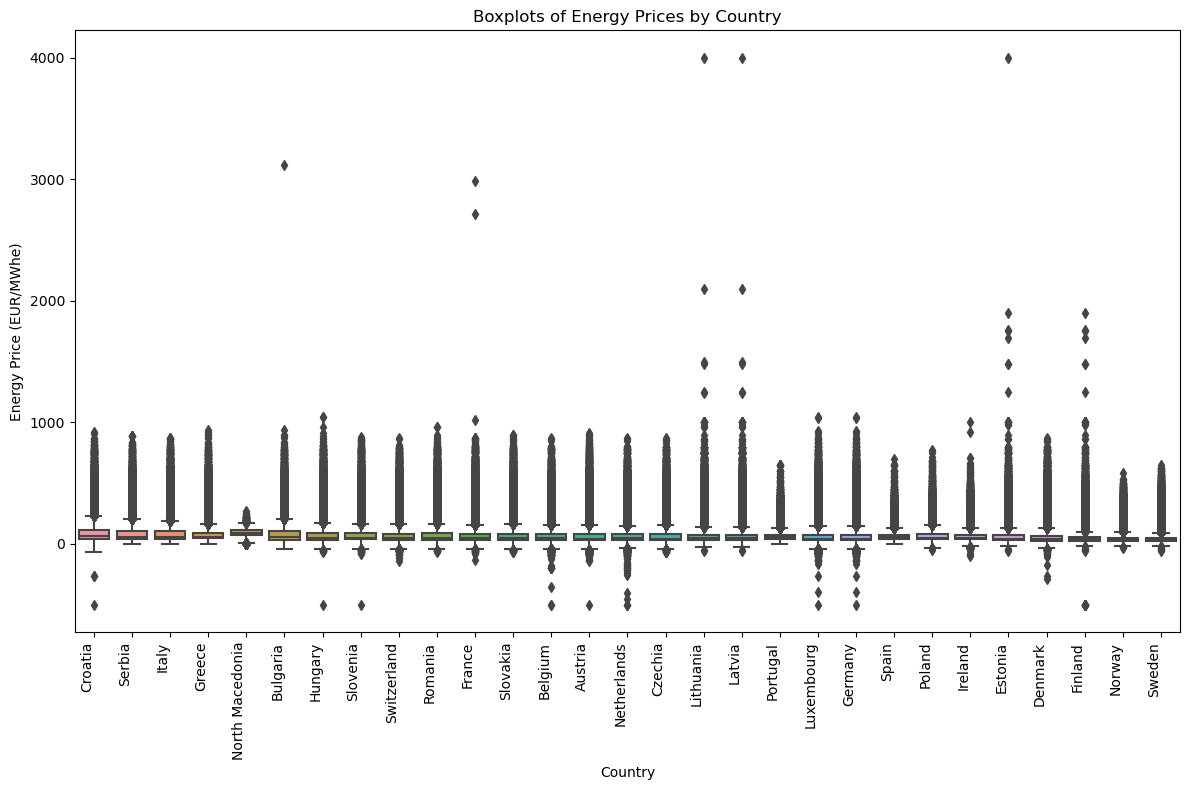

In [28]:
import seaborn as sns

data_summary = data_summary.sort_values(by='mean', ascending=False)

# Plot boxplots using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Country', y='Price (EUR/MWhe)', order=data_summary['Country'])
plt.title("Boxplots of Energy Prices by Country")
plt.xlabel("Country")
plt.ylabel("Energy Price (EUR/MWhe)")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [22]:
## Step 2: Data Preparation
# Assuming data_provider and related data functions are defined in data_provider.py

def load_data(args, flag='train'):
    return data_provider(args, flag)


In [23]:
## Step 3: Model Definition
# Load the model definition from model.py
class Basisformer(nn.Module):
    def __init__(self,seq_len,pred_len,d_model,heads,basis_nums,block_nums,bottle,map_bottleneck,device,tau):
        super().__init__()
        self.d_model = d_model
        self.k = heads
        self.N = basis_nums
        self.coefnet = Coefnet(blocks=block_nums,d_model=d_model,heads=heads)
            
        self.pred_len = pred_len
        self.seq_len = seq_len
        
        self.MLP_x = MLP_bottle(seq_len,heads * int(seq_len/heads),int(seq_len/bottle))
        self.MLP_y = MLP_bottle(pred_len,heads * int(pred_len/heads),int(pred_len/bottle))
        self.MLP_sx = MLP_bottle(heads * int(seq_len/heads),seq_len,int(seq_len/bottle))
        self.MLP_sy = MLP_bottle(heads * int(pred_len/heads),pred_len,int(pred_len/bottle))
        
        self.project1 = wn(nn.Linear(seq_len,d_model))
        self.project2 = wn(nn.Linear(seq_len,d_model))
        self.project3 = wn(nn.Linear(pred_len,d_model))
        self.project4 = wn(nn.Linear(pred_len,d_model))
        self.criterion1 = nn.MSELoss()
        self.criterion2 = nn.L1Loss(reduction='none')
        
        self.device = device
                        
        # smooth array
        arr = torch.zeros((seq_len+pred_len-2,seq_len+pred_len))
        for i in range(seq_len+pred_len-2):
            arr[i,i]=-1
            arr[i,i+1] = 2
            arr[i,i+2] = -1
        self.smooth_arr = arr.to(device)
        self.map_MLP = MLP_bottle(1,self.N*(self.seq_len+self.pred_len),map_bottleneck,bias=True)
        self.tau = tau
        self.epsilon = 1E-5
        
    def forward(self,x,mark,y=None,train=True,y_mark=None):
        mean_x = x.mean(dim=1,keepdim=True)
        std_x = x.std(dim=1,keepdim=True)
        feature = (x - mean_x) / (std_x + self.epsilon)
        B,L,C = feature.shape
        feature = feature.permute(0,2,1)
        feature = self.project1(feature)   #(B,C,d)
        
        m = self.map_MLP(mark[:,0].unsqueeze(1)).reshape(B,self.seq_len + self.pred_len,self.N)
        m = m / torch.sqrt(torch.sum(m**2,dim=1,keepdim=True)+self.epsilon)
        
        raw_m1 = m[:,:self.seq_len].permute(0,2,1)  #(B,L,N)
        raw_m2 = m[:,self.seq_len:].permute(0,2,1)   #(B,L',N)
        m1 = self.project2(raw_m1)    #(B,N,d)
        
        score,attn_x1,attn_x2 = self.coefnet(m1,feature)    #(B,k,C,N)

        base = self.MLP_y(raw_m2).reshape(B,self.N,self.k,-1).permute(0,2,1,3)   #(B,k,N,L/k)
        out = torch.matmul(score,base).permute(0,2,1,3).reshape(B,C,-1)  #(B,C,k * (L/k))
        out = self.MLP_sy(out).reshape(B,C,-1).permute(0,2,1)   #（BC,L）
        
        output = out * (std_x + self.epsilon) + mean_x

        #loss
        if train:
            l_smooth = torch.einsum('xl,bln->xbn',self.smooth_arr,m)
            l_smooth = abs(l_smooth).mean()
            # l_smooth = self.criterion1(l_smooth,torch.zeros_like(l_smooth))
            
            # #back
            mean_y = y.mean(dim=1,keepdim=True)
            std_y = y.std(dim=1,keepdim=True)
            feature_y_raw = (y - mean_y) / (std_y + self.epsilon)
            
            feature_y = feature_y_raw.permute(0,2,1)
            feature_y = self.project3(feature_y)   #(BC,d)
            m2 = self.project4(raw_m2)    #(N,d)
            
            score_y,attn_y1,attn_y2 = self.coefnet(m2,feature_y)    #(B,k,C,N)
            logit_q = score.permute(0,2,3,1) #(B,C,N,k)
            logit_k = score_y.permute(0,2,3,1) #(B,C,N,k)

            # l_pos = torch.bmm(logit_q.view(-1,1,self.k), logit_k.view(-1,self.k,1)).reshape(-1,1)  #(B*C*N,1,1)
            l_neg = torch.bmm(logit_q.reshape(-1,self.N,self.k), logit_k.reshape(-1,self.N,self.k).permute(0,2,1)).reshape(-1,self.N) # (B,C*N,N)

            labels = torch.arange(0,self.N,1,dtype=torch.long).unsqueeze(0).repeat(B*C,1).reshape(-1)

            labels = labels.to(self.device)

            cross_entropy_loss = nn.CrossEntropyLoss()
            l_entropy = cross_entropy_loss(l_neg/self.tau, labels)           
            
            return output,l_entropy,l_smooth,attn_x1,attn_x2,attn_y1,attn_y2
        else:
            # #back
            mean_y = y.mean(dim=1,keepdim=True)
            std_y = y.std(dim=1,keepdim=True)
            feature_y_raw = (y - mean_y) / (std_y + self.epsilon)
            
            feature_y = feature_y_raw.permute(0,2,1)
            feature_y = self.project3(feature_y)   #(BC,d)
            m2 = self.project4(raw_m2)    #(N,d)
            
            score_y,attn_y1,attn_y2 = self.coefnet(m2,feature_y)    #(B,k,C,N)
            return output,m,attn_x1,attn_x2,attn_y1,attn_y2      
        
        


In [24]:
## Step 4: Training and Validation

def vali(vali_data, vali_loader, criterion, epoch, writer, flag='vali'):
    total_loss = []
    model.eval()
    with torch.no_grad():
        for i, (batch_x, batch_y, batch_x_mark, batch_y_mark, index) in enumerate(vali_loader):
            batch_x = batch_x.float().to(device)
            batch_y = batch_y.float()

            f_dim = -1 if args.features == 'MS' else 0
            batch_y = batch_y[:, -args.pred_len:, f_dim:].to(device)
            batch_y_mark = batch_y_mark.float().to(device)

            real_batch_x = batch_x

            outputs, m, attn_x1, attn_x2, attn_y1, attn_y2 = model(batch_x, index.float().to(device), batch_y, train=False, y_mark=batch_y_mark)

            pred = outputs.detach().cpu()
            true = batch_y.detach().cpu()

            loss_raw = criterion(pred, true)
            loss = loss_raw.mean()

            total_loss.append(loss)

            if i == 0:
                fig = plot_seq_feature(outputs, batch_y, real_batch_x, flag)
                writer.add_figure("figure_{}".format(flag), fig, global_step=epoch)

    total_loss = np.average(total_loss)
    model.train()
    return total_loss

def train():
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print('[Info] Number of parameters: {}'.format(num_params))
    train_set, train_loader = load_data(args, "train")
    vali_data, vali_loader = load_data(args, flag='val')
    test_data, test_loader = load_data(args, flag='test')

    para1 = [param for name, param in model.named_parameters() if 'smooth_arr' not in name]
    para2 = [param for name, param in model.named_parameters() if 'smooth_arr' in name]
    optimizer = torch.optim.AdamW([
        {'params': para1},
        {'params': para2, 'lr': args.learning_rate * 0.1}
    ], lr=args.learning_rate)

    criterion = nn.MSELoss()
    writer = SummaryWriter(log_dir=args.log_dir)

    for epoch in range(args.train_epochs):
        model.train()
        total_loss = []

        for i, (batch_x, batch_y, batch_x_mark, batch_y_mark, index) in enumerate(train_loader):
            batch_x = batch_x.float().to(device)
            batch_y = batch_y.float()

            f_dim = -1 if args.features == 'MS' else 0
            batch_y = batch_y[:, -args.pred_len:, f_dim:].to(device)
            batch_y_mark = batch_y_mark.float().to(device)

            optimizer.zero_grad()
            outputs, l_entropy, l_smooth, attn_x1, attn_x2, attn_y1, attn_y2 = model(batch_x, index.float().to(device), batch_y, y_mark=batch_y_mark)

            pred = outputs.detach().cpu()
            true = batch_y.detach().cpu()

            loss_raw = criterion(pred, true)
            loss = loss_raw.mean() + l_entropy + l_smooth

            loss.backward()
            optimizer.step()

            total_loss.append(loss.item())

            if (i + 1) % 100 == 0:
                print("Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}".format(epoch + 1, args.train_epochs, i + 1, len(train_loader), loss.item()))

        train_loss = np.average(total_loss)
        vali_loss = vali(vali_data, vali_loader, criterion, epoch, writer, flag='vali')
        print("Epoch: {} Train Loss: {} Validation Loss: {}".format(epoch + 1, train_loss, vali_loss))
        writer.add_scalar('train_loss', train_loss, global_step=epoch)
        writer.add_scalar('vali_loss', vali_loss, global_step=epoch)

    writer.close()



In [25]:
## Step 5: Execution

    train()


IndentationError: unexpected indent (4293515873.py, line 3)

In [1]:
import torch

# Load the model checkpoints
final_checkpoint_path = 'records/all_countries/features_M/seq_len96,pred_len96/checkpoint/final_checkpoint.pth'
valid_best_checkpoint_path = 'records/all_countries/features_M/seq_len96,pred_len96/checkpoint/valid_best_checkpoint.pth'

# Load the checkpoints
final_checkpoint = torch.load(final_checkpoint_path, map_location=torch.device('cpu'))
valid_best_checkpoint = torch.load(valid_best_checkpoint_path, map_location=torch.device('cpu'))

# Inspect the structure of the checkpoints
final_checkpoint_structure = {key: type(value) for key, value in final_checkpoint.items()}
valid_best_checkpoint_structure = {key: type(value) for key, value in valid_best_checkpoint.items()}

print("Final Checkpoint Structure:", final_checkpoint_structure)
print("Valid Best Checkpoint Structure:", valid_best_checkpoint_structure)


Final Checkpoint Structure: {'coefnet.layers.0.cross_attention_basis.query_projection.bias': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.query_projection.weight_g': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.query_projection.weight_v': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.key_projection.bias': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.key_projection.weight_g': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.key_projection.weight_v': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.value_projection.bias': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.value_projection.weight_g': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.value_projection.weight_v': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.out_projection.bias': <class 'torch.Tensor'>, 'coefnet.layers.0.cross_attention_basis.out_projection.weight_g': <class 't

In [3]:
log_file_path = 'records/all_countries/features_M/seq_len96,pred_len96/train.log'

with open(log_file_path, 'r') as file:
    log_contents = file.read()

print(log_contents)


INFO:root:Args in experiment:
INFO:root:Namespace(is_training=True, device=0, num_workers=0, data='custom', root_path='data', data_path='all_countries.csv', features='M', target='Price (EUR/MWhe)', freq='h', seq_len=96, label_len=96, pred_len=96, embed='timeF', heads=8, d_model=64, N=5, block_nums=2, bottleneck=2, map_bottleneck=20, train_epochs=1, batch_size=32, patience=3, learning_rate=0.0005, tau=0.07, loss_weight_prediction=1.0, loss_weight_infonce=1.0, loss_weight_smooth=1.0, check_point='checkpoint')
INFO:root:Basisformer(
  (coefnet): Coefnet(
    (layers): ModuleList(
      (0-1): 2 x BCAB(
        (cross_attention_basis): channel_AutoCorrelationLayer(
          (query_projection): Linear(in_features=64, out_features=64, bias=True)
          (key_projection): Linear(in_features=64, out_features=64, bias=True)
          (value_projection): Linear(in_features=64, out_features=64, bias=True)
          (out_projection): Linear(in_features=64, out_features=64, bias=True)
          

Final Train Loss: 0.0136619
Final Validation Loss: 0.0037231
Final Test Loss: 0.0047886


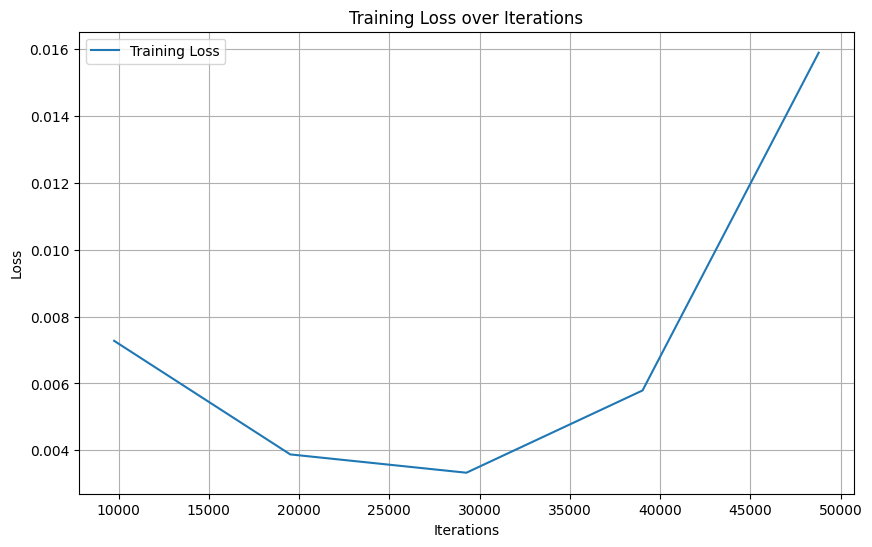

In [5]:
import matplotlib.pyplot as plt
import re

# Extract iteration numbers and losses
iterations = re.findall(r"iters: (\d+)", log_contents)
losses = re.findall(r"\| loss: ([0-9.]+)", log_contents)

# Convert the extracted strings to integers and floats respectively
iterations = [int(iter) for iter in iterations]
losses = [float(loss) for loss in losses]

# Extract final loss values
train_loss_match = re.search(r"Train Loss: ([0-9.]+)", log_contents)
vali_loss_match = re.search(r"Vali Loss: ([0-9.]+)", log_contents)
test_loss_match = re.search(r"Test Loss: ([0-9.]+)", log_contents)

if train_loss_match and vali_loss_match and test_loss_match:
    train_loss = float(train_loss_match.group(1))
    vali_loss = float(vali_loss_match.group(1))
    test_loss = float(test_loss_match.group(1))

    # Print final loss values
    print(f"Final Train Loss: {train_loss}")
    print(f"Final Validation Loss: {vali_loss}")
    print(f"Final Test Loss: {test_loss}")

    # Plot the training loss over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, losses, label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Failed to extract final loss values from the log.")


Model Training and Evaluation Logs
       epoch  train_loss  vali_loss  test_loss  loss_pred  loss_entropy  \
Run 1      1    0.013662   0.003723   0.004789   0.007862      0.002831   
Run 2      1    0.016805   0.004826   0.005935   0.009989      0.003236   
Run 3      1    0.017467   0.006086   0.007449   0.013131      0.002266   
Run 4      1    0.025424   0.008856   0.009862   0.020503      0.002726   

       loss_smooth         time  
Run 1     0.002969  3615.073413  
Run 2     0.003580  3494.292993  
Run 3     0.002070  3898.435118  
Run 4     0.002195  4388.012968  


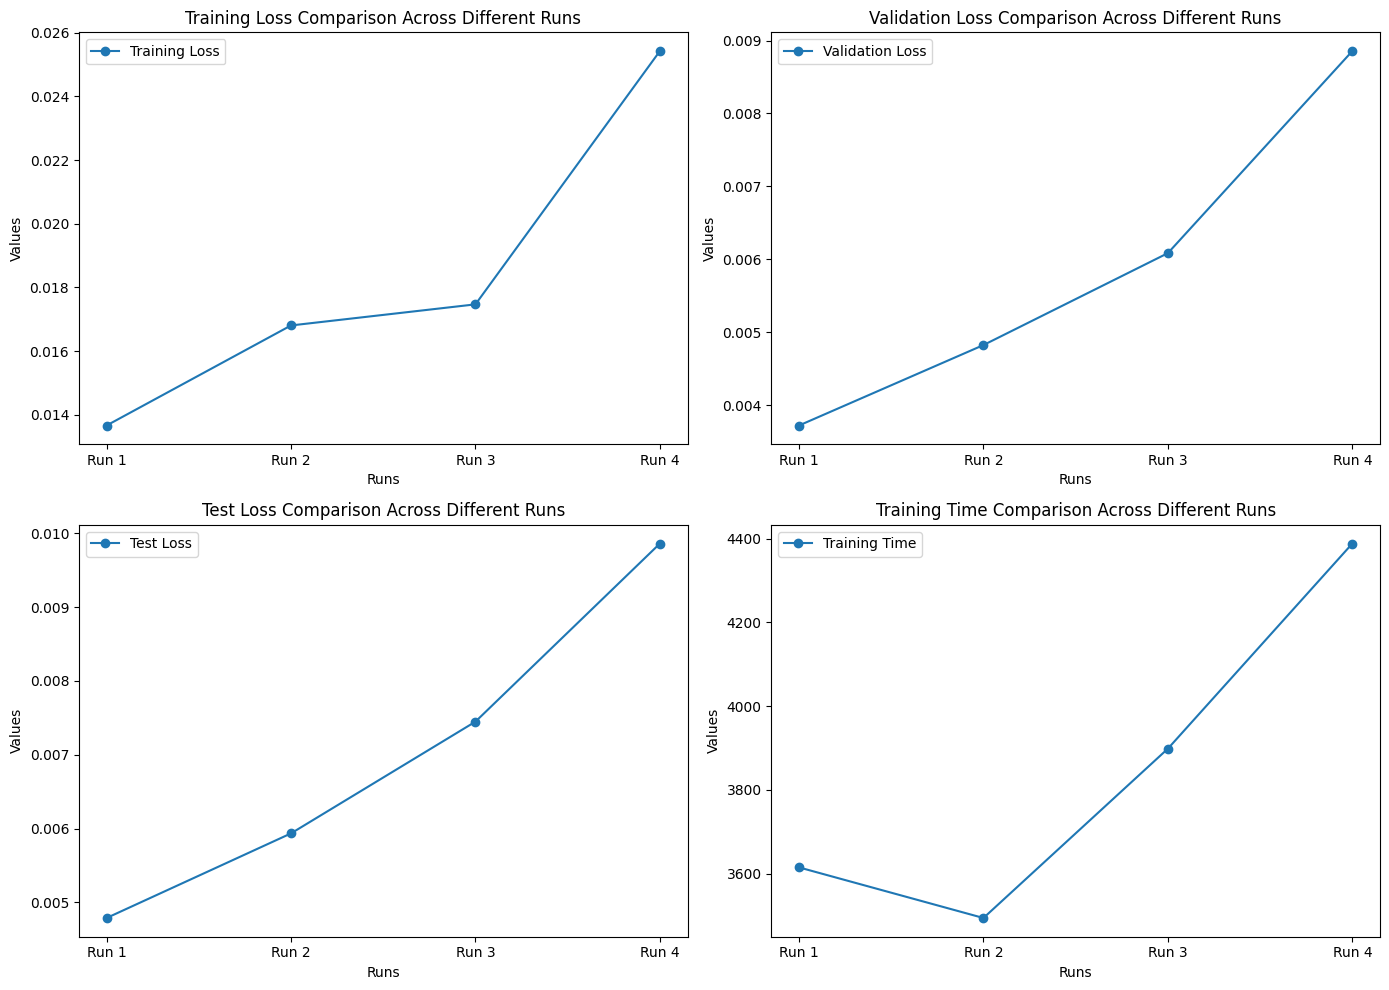

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Log data from runs
log_data = [
    {
        "epoch": 1,
        "train_loss": 0.0136619,
        "vali_loss": 0.0037231,
        "test_loss": 0.0047886,
        "loss_pred": 0.00786220448397294,
        "loss_entropy": 0.0028309395584325187,
        "loss_smooth": 0.0029687882786803167,
        "time": 3615.073413133621
    },
    {
        "epoch": 1,
        "train_loss": 0.0168049,
        "vali_loss": 0.0048258,
        "test_loss": 0.0059350,
        "loss_pred": 0.009989046275941741,
        "loss_entropy": 0.0032360439873068076,
        "loss_smooth": 0.003579777969087008,
        "time": 3494.2929928302765
    },
    {
        "epoch": 1,
        "train_loss": 0.0174674,
        "vali_loss": 0.0060858,
        "test_loss": 0.0074490,
        "loss_pred": 0.013131296017147276,
        "loss_entropy": 0.002265935485545761,
        "loss_smooth": 0.0020701771458536506,
        "time": 3898.435118198395
    },
    {
        "epoch": 1,
        "train_loss": 0.0254245,
        "vali_loss": 0.0088556,
        "test_loss": 0.0098619,
        "loss_pred": 0.020502921171709872,
        "loss_entropy": 0.002726393998175982,
        "loss_smooth": 0.002195145425148305,
        "time": 4388.012967824936
    }
]

# Create a DataFrame
df = pd.DataFrame(log_data)
df.index = [f'Run {i+1}' for i in range(len(log_data))]

# Display the DataFrame
print("Model Training and Evaluation Logs")
print(df)

# Plotting
plt.figure(figsize=(14, 10))

# Training Loss
plt.subplot(2, 2, 1)
plt.plot(df.index, df['train_loss'], marker='o', label='Training Loss')
plt.xlabel('Runs')
plt.ylabel('Values')
plt.title('Training Loss Comparison Across Different Runs')
plt.legend()

# Validation Loss
plt.subplot(2, 2, 2)
plt.plot(df.index, df['vali_loss'], marker='o', label='Validation Loss')
plt.xlabel('Runs')
plt.ylabel('Values')
plt.title('Validation Loss Comparison Across Different Runs')
plt.legend()

# Test Loss
plt.subplot(2, 2, 3)
plt.plot(df.index, df['test_loss'], marker='o', label='Test Loss')
plt.xlabel('Runs')
plt.ylabel('Values')
plt.title('Test Loss Comparison Across Different Runs')
plt.legend()

# Training Time
plt.subplot(2, 2, 4)
plt.plot(df.index, df['time'], marker='o', label='Training Time')
plt.xlabel('Runs')
plt.ylabel('Values')
plt.title('Training Time Comparison Across Different Runs')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

def plot_seq_feature(pred_, true_, history_,label = "train",error = False,input='',wv=''):
    assert(pred_.shape == true_.shape)

    index = -1
    if pred_.shape[2]>800:
        index = 840
    pred = pred_.detach().clone()[..., index].unsqueeze(2)
    true = true_.detach().clone()[..., index].unsqueeze(2)
    history = history_.detach().clone()[..., index].unsqueeze(2)

    if len(pred.shape) == 3:  #BLD
        if error == False:
            pred = pred[0]
            true = true[0]
            history = history[0]
        else:
            largest_loss = 0
            largest_index = 0
            criterion = nn.MSELoss()
            for i in range(pred.shape[0]):
                loss = criterion(pred[i],true[i])
                if  loss > largest_loss:
                    largest_loss = loss
                    largest_index = i
            pred = pred[largest_index]
            true = true[largest_index]
            history = history[largest_index]
            input_error = input[largest_index]
            # wv_error = wv[largest_index]
            # print('input mean',input_error.mean())
            # print('input std',input_error.std())
            # print('out mean',true.mean())
            # print('out std',true.std())
            # print('wv mean',wv_error.mean())
            # print('wv std',wv_error.std())
            # print('end')

    pred = pred.cpu().numpy()
    true = true.cpu().numpy()
    history = history.cpu().numpy()

    L, D = pred.shape
    L_h,D_h = history.shape
    # if D == 1:
    #     pic_row, pic_col = 1, 1
    # else:
    #     pic_col = 2
    #     pic_row = math.ceil(D/pic_col)
    pic_row, pic_col = D, 1


    fig = plt.figure(figsize=(8*pic_row,8*pic_col))
    for i in range(1):
        ax = plt.subplot(pic_row,pic_col,i+1)
        ax.plot(np.arange(L_h), history[:, i], label = "history")
        ax.plot(np.arange(L_h,L_h+L), pred[:, i], label = "pred")
        ax.plot(np.arange(L_h,L_h+L), true[:, i], label = "true")
        ax.set_title("dimension = {},  ".format(i) + label)
        ax.legend()

    return fig


In [12]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

class Data:
    def __init__(self, root_path, data_path, target, features, seq_len, set_type, timeenc, freq):
        self.root_path = root_path
        self.data_path = data_path
        self.target = target
        self.features = features
        self.scale = True
        self.seq_len = seq_len
        self.set_type = set_type
        self.timeenc = timeenc
        self.freq = freq
        self.__read_data__()

    def __read_data__(self):
        self.scaler = StandardScaler()
        df_raw = pd.read_csv(os.path.join(self.root_path, self.data_path))

        # Encode the country column
        country_encoded = pd.get_dummies(df_raw['Country'])
        df_raw = pd.concat([df_raw, country_encoded], axis=1)
        df_raw = df_raw.drop(columns=['ISO3 Code', 'Datetime (Local)', 'Country'])

        cols = list(df_raw.columns)
        
        # Debugging prints
        print("Columns before removal:", cols)
        print("Target column:", self.target)
        
        # Ensure the target column and 'Datetime (UTC)' exist before removing
        if self.target in cols:
            cols.remove(self.target)
        else:
            print(f"Warning: target '{self.target}' not found in columns list.")
        
        if 'Datetime (UTC)' in cols:
            cols.remove('Datetime (UTC)')
        else:
            print("Warning: 'Datetime (UTC)' not found in columns list.")
        
        df_raw = df_raw[['Datetime (UTC)'] + cols + [self.target]]
        
        # Debugging prints
        print("Columns after removal:", list(df_raw.columns))

        num_train = int(len(df_raw) * 0.7)
        num_test = int(len(df_raw) * 0.2)
        num_vali = len(df_raw) - num_train - num_test
        border1s = [0, num_train - self.seq_len, len(df_raw) - num_test - self.seq_len]
        border2s = [num_train, num_train + num_vali, len(df_raw)]
        border1 = border1s[self.set_type]
        border2 = border2s[self.set_type]

        if self.features == 'M' or self.features == 'MS':
            cols_data = df_raw.columns[1:]
            df_data = df_raw[cols_data]
        elif self.features == 'S':
            df_data = df_raw[[self.target]]

        if self.scale:
            train_data = df_data[border1s[0]:border2s[0]]
            self.scaler.fit(train_data.values)
            data = self.scaler.transform(df_data.values)
        else:
            data = df_data.values

        df_stamp = df_raw[['Datetime (UTC)']][border1:border2]
        df_stamp['Datetime (UTC)'] = pd.to_datetime(df_stamp['Datetime (UTC)'])
        if self.timeenc == 0:
            df_stamp['month'] = df_stamp['Datetime (UTC)'].apply(lambda row: row.month)
            df_stamp['day'] = df_stamp['Datetime (UTC)'].apply(lambda row: row.day)
            df_stamp['weekday'] = df_stamp['Datetime (UTC)'].apply(lambda row: row.weekday())
            df_stamp['hour'] = df_stamp['Datetime (UTC)'].apply(lambda row: row.hour)
            data_stamp = df_stamp.drop(['Datetime (UTC)'], axis=1).values
        elif self.timeenc == 1:
            data_stamp = time_features(pd.to_datetime(df_stamp['Datetime (UTC)'].values), freq=self.freq)
            data_stamp = data_stamp.transpose(1, 0)

        self.data_x = data[border1:border2]
        self.data_y = data[border1:border2]
        self.data_stamp = data_stamp

# Example usage:
root_path = '/Users/ekaterinabasova/Desktop/HU/Projects/APA_Transformers/apa_group4_transformers_for_multivar_energy_forecasting/data'
data_path = 'all_countries.csv'
target = 'Price (EUR/MWhe)'
features = 'M'
seq_len = 96
set_type = 0  # This can be 0, 1, or 2 based on your use case
timeenc = 0
freq = 'h'

data_instance = Data(root_path, data_path, target, features, seq_len, set_type, timeenc, freq)


Columns before removal: ['Datetime (UTC)', 'Price (EUR/MWhe)', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland']
Target column: Price (EUR/MWhe)
Columns after removal: ['Datetime (UTC)', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Price (EUR/MWhe)']


In [13]:
# Inspect the contents of data_x, data_y, and data_stamp
print("Data X:")
print(data_instance.data_x)

print("Data Y:")
print(data_instance.data_y)

print("Data Stamp:")
print(data_instance.data_stamp)



Data X:
[[ 4.25289445 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.68774711]
 [ 4.25289445 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.72068542]
 [ 4.25289445 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.70624508]
 ...
 [-0.23513398 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.24606343]
 [-0.23513398 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.48522422]
 [-0.23513398 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.40037226]]
Data Y:
[[ 4.25289445 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.68774711]
 [ 4.25289445 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.72068542]
 [ 4.25289445 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.70624508]
 ...
 [-0.23513398 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.24606343]
 [-0.23513398 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.48522422]
 [-0.23513398 -0.23513398 -0.2108568  ...  0.         -0.23513398
  -0.40037226]]
